Histogram of pixel values

<>:7: SyntaxWarning: invalid escape sequence '\B'
<>:7: SyntaxWarning: invalid escape sequence '\B'
C:\Users\sastu\AppData\Local\Temp\ipykernel_12580\3211991861.py:7: SyntaxWarning: invalid escape sequence '\B'
  image_path ='test\Benign\BreaDM-Be-1810\SUB1\p-030.jpg'


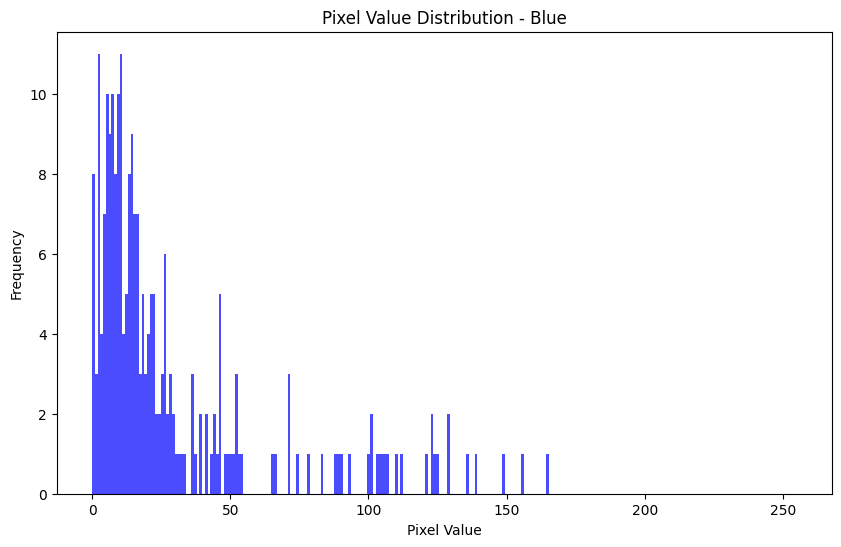

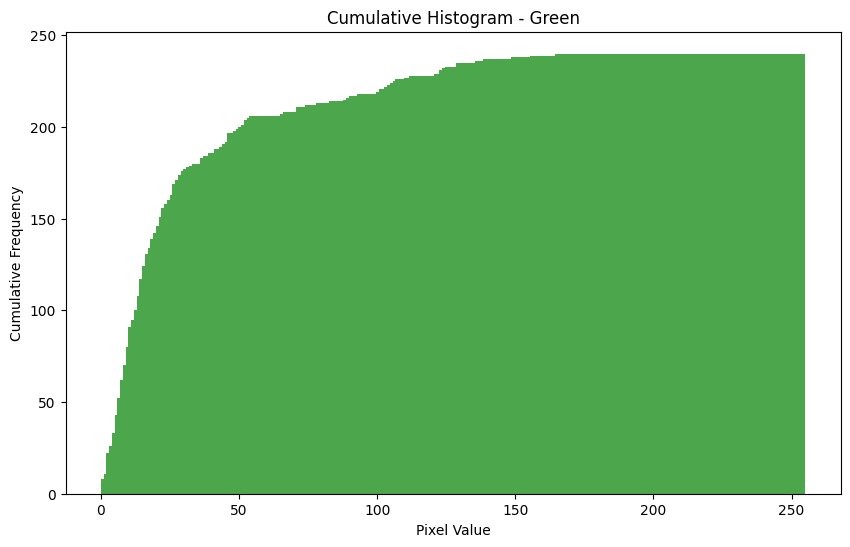

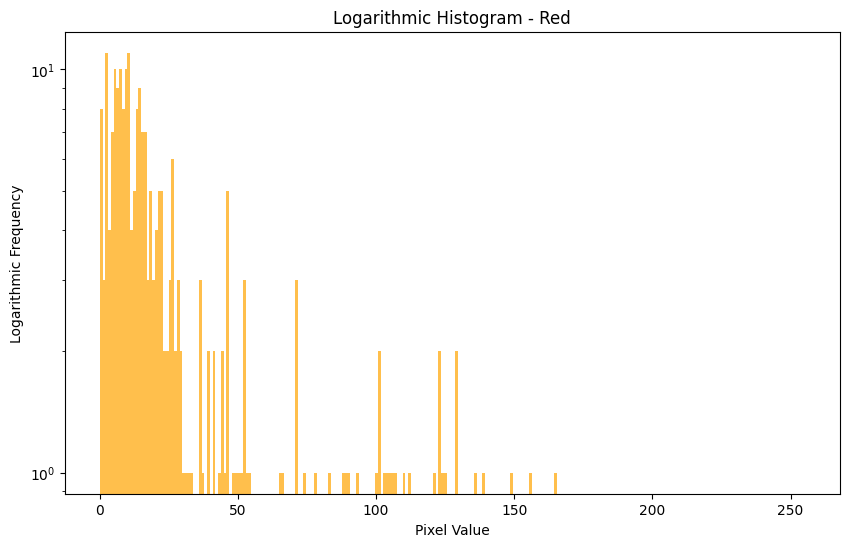

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Image path
image_path ='test\Benign\BreaDM-Be-1810\SUB1\p-030.jpg'

# Check if the file exists
if not os.path.exists(image_path):
    print(f"Error: The file at {image_path} does not exist.")
else:
    # Load the image and convert it to grayscale
    try:
        image = Image.open(image_path).convert('L')
        
        # Convert the image to a NumPy array
        image_array = np.array(image)

        # Flatten the image array to 1D
        image_flat = image_array.flatten()

        # Plot basic histogram with color
        plt.figure(figsize=(10, 6))
        plt.hist(image_flat, bins=256, range=(0, 255), color='blue', alpha=0.7)
        plt.title('Pixel Value Distribution - Blue')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.show()

        # Cumulative Histogram
        plt.figure(figsize=(10, 6))
        plt.hist(image_flat, bins=256, range=(0, 255), color='green', alpha=0.7, cumulative=True)
        plt.title('Cumulative Histogram - Green')
        plt.xlabel('Pixel Value')
        plt.ylabel('Cumulative Frequency')
        plt.show()

        # Logarithmic Histogram
        plt.figure(figsize=(10, 6))
        plt.hist(image_flat, bins=256, range=(0, 255), color='orange', alpha=0.7, log=True)
        plt.title('Logarithmic Histogram - Red')
        plt.xlabel('Pixel Value')
        plt.ylabel('Logarithmic Frequency')
        plt.show()

    except OSError as e:
        print(f"Error opening the image: {e}")


Setting up dataloaders

creating Dataset with updated transformation

<>:30: SyntaxWarning: invalid escape sequence '\B'
<>:30: SyntaxWarning: invalid escape sequence '\B'
C:\Users\sastu\AppData\Local\Temp\ipykernel_18360\2058566903.py:30: SyntaxWarning: invalid escape sequence '\B'
  image_path ='test\Benign\BreaDM-Be-1810\SUB1\p-030.jpg'  # Replace with the path to your image


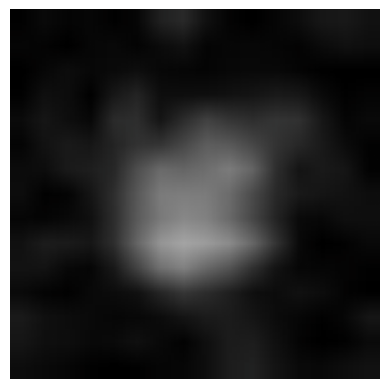

In [1]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt

# Define the transformation for a single image (resize to 224x224)
transform = transforms.Compose([
    transforms.Resize((224, 224)),      # Resize to 224x224
    transforms.ToTensor(),              # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Define a custom dataset for a single image
class SingleImageDataset(Dataset):
    def __init__(self, image_path, transform=None):
        self.image_path = image_path
        self.transform = transform

    def __len__(self):
        return 1  # Only one image

    def __getitem__(self, idx):
        image = Image.open(self.image_path).convert("RGB")  # Load and convert image to RGB
        if self.transform:
            image = self.transform(image)
        return image

# Load a single image and apply transformations
image_path ='test\Benign\BreaDM-Be-1810\SUB1\p-030.jpg'  # Replace with the path to your image
dataset = SingleImageDataset(image_path=image_path, transform=transform)

# Create a DataLoader for the single image dataset
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

# Display the transformed image
for img in dataloader:
    img = img.squeeze(0)  # Remove the batch dimension
    img = img.permute(1, 2, 0)  # Rearrange dimensions for displaying

    # Unnormalize for display
    img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    img = img.clamp(0, 1)  # Clamp values to range [0, 1]

    plt.imshow(img)
    plt.axis('off')
    plt.show()
    break
